<a href="https://colab.research.google.com/github/ppug15510-jpg/Exercise_2025/blob/main/192USGS_193NOAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#192 지진 발생 지역 지도에 표시하기
from urllib.request import urlopen

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&minmag=3.0'
with urlopen(url) as f:
    print(f.read().decode())

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2025-12-12T10:05:19.253Z,36.0804,140.2301,56.218,4.9,mb,77,131,1.701,1.41,us,us6000rue0,2025-12-12T11:21:30.284Z,"5 km NNE of Ami, Japan",earthquake,6.9,6.824,0.033,291,reviewed,us,us
2025-12-12T09:14:46.259Z,-23.863,-179.8937,500.742,4.4,mb,25,190,6.383,0.67,us,us6000rudu,2025-12-12T09:40:14.040Z,"south of the Fiji Islands",earthquake,13.98,16.248,0.117,21,reviewed,us,us
2025-12-12T07:55:44.315Z,41.254,142.3183,61.659,4.6,mb,36,153,0.987,0.47,us,us6000rudq,2025-12-12T10:25:16.601Z,"91 km ENE of Yokohama, Japan",earthquake,7.73,5.801,0.105,27,reviewed,us,us
2025-12-12T07:23:00.512Z,60.5216,-139.8441,3.736,3,ml,27,80,0.473,0.69,us,us6000rudj,2025-12-12T08:56:05.040Z,"108 km N of Yakutat, Alaska",earthquake,4.21,10.931,0.043,72,reviewed,us,us
2025-12-12T06:16:29.730Z,19.1083333333333,-64.6071666666667,18.9,3.24,md,8,281,0.6447,0.1

In [10]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: pyshp
    Found existing installation: pyshp 3.0.3
    Uninstalling pyshp-3.0.3:
      Successfully uninstalled pyshp-3.0.3


In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from urllib.request import urlopen
from time import localtime, strftime
from math import sqrt

In [2]:
def readEarthquakeData(minmag=3):
    lats = []; lons = []; mags = []
    guery = f'format=csv&minmagnitude={minmag}'
    url = f'https://earthquake.usgs.gov/fdsnws/event/1/query?{guery}'
    with urlopen(url) as f:
        earthquake_data = f.read().decode()

    data = earthquake_data.split('\n')
    del data[0]

    for d in data:
        tmp = d.split(',')
        if len(tmp) > 4:
            lats.append(float(tmp[1]))
            lons.append(float(tmp[2]))
            mags.append(float(tmp[4]))

    return lats, lons, mags

In [3]:
def getMarkerColor(mag):
    if mag < 4.0:
        return 'bo'
    elif mag < 5.0:
        return 'go'
    elif mag < 6.0:
        return 'yo'
    elif mag < 7.0:
        return 'mo'
    else:
        return 'ro'

In [4]:
def drawMap(minmag):
    mpl.style.use('seaborn-v0_8-talk')
    krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
    mpl.rc('font', **krfont)
    mpl.rcParams['axes.unicode_minus'] = False

    m = Basemap(projection='robin', resolution='l', lat_0=0, lon_0=128)
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='gray')
    m.drawmapboundary()
    m.drawmeridians(np.arange(0, 360, 30))
    m.drawparallels(np.arange(-90, 90, 30))

    lats, lons, mags = readEarthquakeData(minmag)
    for lat, lon, mag in zip(lats, lons, mags):
        x, y = m(lon, lat)
        color = getMarkerColor(mag)
        m.plot(x, y, color, markersize=sqrt(mag)*mag, alpha=0.7)

    time_stamp = strftime('%Y-%m-%d', localtime())
    title = f'{time_stamp} 기준 1개월간 전 세계 규모 {minmag} 이상 지진 발생 현황'
    plt.title(title)
    plt.show()

조회하고 싶은 최소 지진 규모를 입력하세요:4.6


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

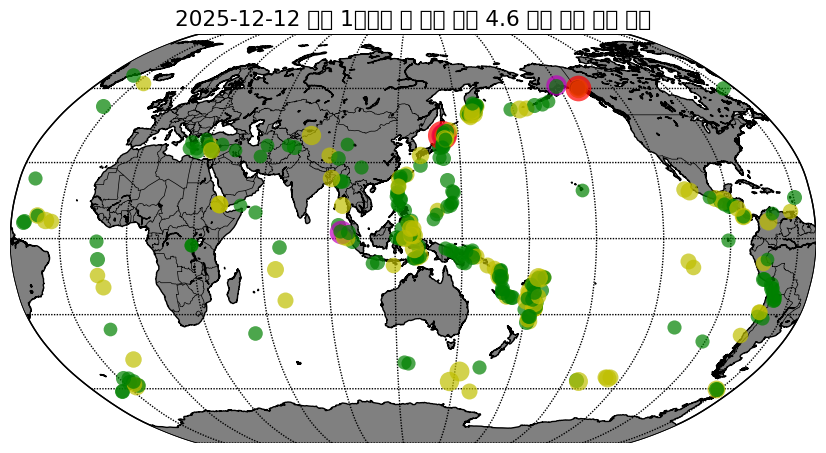

In [5]:
if __name__ == '__main__':
    minmag = input('조회하고 싶은 최소 지진 규모를 입력하세요:')
    try:
        minmag = float(minmag)
        if minmag < 0:
            print(f'입력하신 지진 규모가 0보다 작습니다.')
        else:
            drawMap(minmag)
    except Exception as e:
        print(f'오류 발생: {e}')

In [14]:
#193 기상 정보 지도에 표시하기
!pip install netCDF4

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset as nc

In [22]:
def getAirData():
    ncfile = 'air.sig995.2025.nc'
    f = nc.Dataset(ncfile)
    air = f['air']
    endidx = len(air) - 1

    while True:
        idx = int(input(f'0~{endidx} 사이 숫자를 입력하세요:'))
        if idx < 0 or idx > endidx:
            print(f'입력하신 idx {idx}는 0~{endidx} 사이의 숫자가 아닙니다.')
            continue
        else:
            break

    airtemp = air[:] - 273.15
    airtemp = airtemp[idx,:,:]
    lats = f['lat'][:]
    lons = f['lon'][:]
    elapsed_hours = f['time'][idx]
    datedata = datetime(1800, 1, 1) + timedelta(hours = elapsed_hours+9)

    return airtemp, lats, lons, datedata

In [23]:
def drawMap():
    mpl.style.use('seaborn-v0_8-talk')
    krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
    mpl.rc('font', **krfont)
    mpl.rcParams['axes.unicode_minus'] = False

    airtemp, lats, lons, datedata = getAirData()

    m = Basemap(projection='ortho', lat_0=35, lon_0=128, resolution='l')
    lon2, lat2 = np.meshgrid(lons, lats)
    x, y = m(lon2, lat2)

    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0, 360, 30))
    m.drawparallels(np.arange(-90, 90, 30))

    cs = m.contourf(x, y, airtemp, 20, cmap=mpl.cm.get_cmap('jet'))
    plt.colorbar()

    title = f'{datedata} 평균 기온 분포도'
    plt.title(title)
    plt.show()

0~1371 사이 숫자를 입력하세요:857


/tmp/ipython-input-308684959.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cs = m.contourf(x, y, airtemp, 20, cmap=mpl.cm.get_cmap('jet'))
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: User

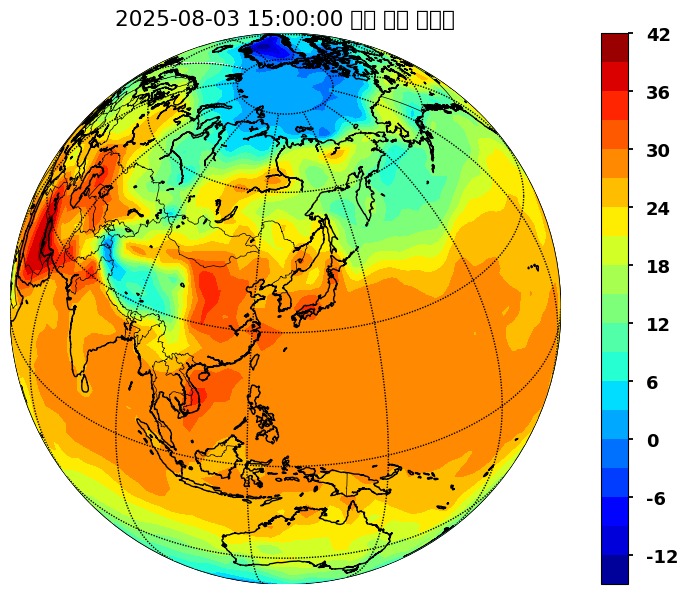

In [24]:
if __name__ == '__main__':
    drawMap()